In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('boston.csv')

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
skew_val=df.skew().sort_values(ascending=False)
skew_val

CRIM       5.223149
CHAS       3.405904
ZN         2.225666
MEDV       1.108098
DIS        1.011781
RAD        1.004815
LSTAT      0.906460
NOX        0.729308
TAX        0.669956
RM         0.403612
INDUS      0.295022
AGE       -0.598963
PTRATIO   -0.802325
B         -2.890374
dtype: float64

## Here as most of the cols skew value doesnt lie between -0.5 to 0.5 , it clarifies presence of outliers.

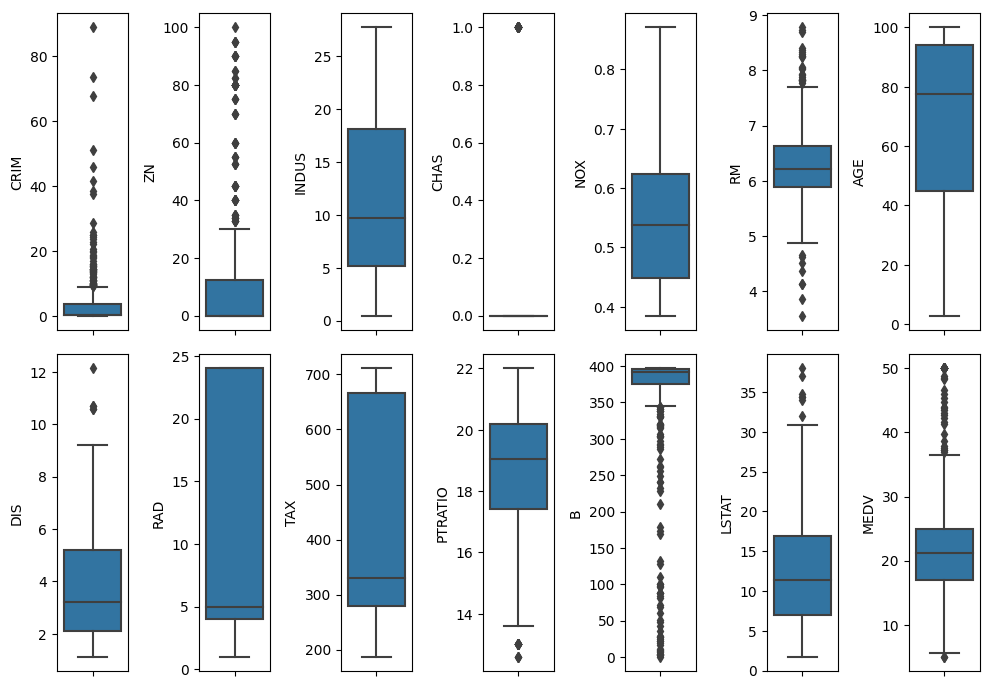

In [6]:
import seaborn as sns
fig,ax=plt.subplots(ncols=7,nrows=2,figsize=(10,7))
ax=ax.flatten()
index = 0
for col,val in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout()

In [14]:
X=df.drop('MEDV',axis=1)
Y=df['MEDV']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.8,random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression

In [20]:
model_lr=LinearRegression()
model_lr.fit(X_train,Y_train)
pred_train=model_lr.predict(X_train)
pred_test=model_lr.predict(X_test)
print(np.sqrt(mean_squared_error(Y_train, pred_train)))
print(np.sqrt(mean_squared_error(Y_test, pred_test)))

4.396188144698282
5.783509315085122


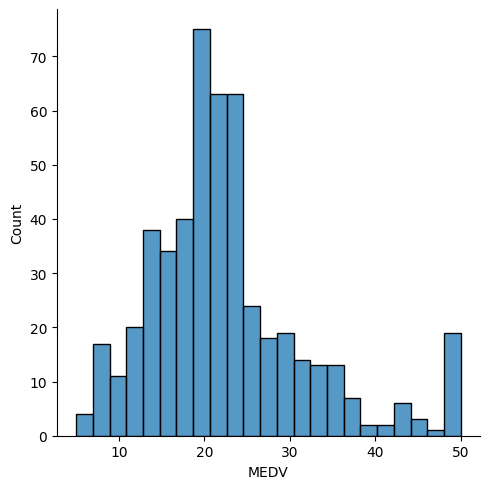

In [21]:
sns.displot(df['MEDV'])

In [22]:
df['MEDV'].skew()

1.1080984082549072

In [23]:
np.log1p(df['MEDV']).skew()

-0.2412435236076338

array([[<AxesSubplot: title={'center': 'MEDV'}>,
        <AxesSubplot: title={'center': 'log(MEDV)'}>]], dtype=object)

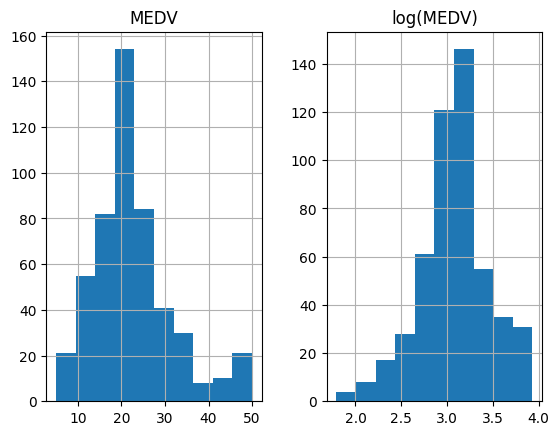

In [24]:
MEDV=pd.DataFrame({'MEDV':df['MEDV'],'log(MEDV)':np.log1p(df['MEDV'])})
MEDV.hist()

In [25]:
MEDV

,MEDV,log(MEDV)
0,24.0,3.218876
1,21.6,3.117950
2,34.7,3.575151
3,33.4,3.538057
4,36.2,3.616309
...,...,...
501,22.4,3.152736
502,20.6,3.072693
503,23.9,3.214868
504,22.0,3.135494


In [26]:
df1=df.drop('MEDV',axis=1)
df1_skew=df1.apply(lambda x :x.skew())
df1_skew

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
dtype: float64

In [27]:
df1_skew=df1_skew[df1_skew>0.75]
df1_skew

CRIM     5.223149
ZN       2.225666
CHAS     3.405904
DIS      1.011781
RAD      1.004815
LSTAT    0.906460
dtype: float64

In [28]:
df1_skew=df1_skew.index
df1[df1_skew]=np.log1p(df1[df1_skew])
df1[df1_skew]

,CRIM,ZN,CHAS,DIS,RAD,LSTAT
0,0.006300,2.944439,0.0,1.627278,0.693147,1.788421
1,0.026944,0.000000,0.0,1.786261,1.098612,2.316488
2,0.026924,0.000000,0.0,1.786261,1.098612,1.615420
3,0.031857,0.000000,0.0,1.954757,1.386294,1.371181
4,0.066770,0.000000,0.0,1.954757,1.386294,1.845300
...,...,...,...,...,...,...
501,0.060747,0.000000,0.0,1.246630,0.693147,2.367436
502,0.044275,0.000000,0.0,1.190127,0.693147,2.310553
503,0.058986,0.000000,0.0,1.152943,0.693147,1.893112
504,0.103991,0.000000,0.0,1.220505,0.693147,2.012233


In [38]:
df1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.813418,0.953873,11.136779,0.047945,0.554695,6.284634,68.574901,1.479648,2.054483,408.237154,18.455534,356.674032,2.475610
std,1.022731,1.620831,6.860353,0.176055,0.115878,0.702617,28.148861,0.413390,0.751839,168.537116,2.164946,91.294864,0.539033
min,0.006300,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,0.755934,0.693147,187.000000,12.600000,0.320000,1.004302
25%,0.078853,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,1.131459,1.609438,279.000000,17.400000,375.377500,2.073162
50%,0.228336,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,1.436855,1.791759,330.000000,19.050000,391.440000,2.514464
75%,1.542674,2.602690,18.100000,0.000000,0.624000,6.623500,94.075000,1.822659,3.218876,666.000000,20.200000,396.225000,2.887869
max,4.499545,4.615121,27.740000,0.693147,0.871000,8.780000,100.000000,2.574633,3.218876,711.000000,22.000000,396.900000,3.662792


In [39]:
X=df
Y=MEDV['log(MEDV)']

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=0)

In [45]:
from sklearn.metrics import r2_score,mean_absolute_error

model_1=LinearRegression()
model_1.fit(X_train,Y_train)

pred_train=model_1.predict(X_train)
pred_test=model_1.predict(X_test)


print('Training Pred')
print(f'R2 SCORE : {r2_score(pred_train,Y_train)}  MEAN ABSOLUTE ERROR: {mean_absolute_error(pred_train,Y_train)}')

print('Testing Pred')
print(f'R2 SCORE : {r2_score(pred_test,Y_test)}  MEAN ABSOLUTE ERROR: {mean_absolute_error(pred_test,Y_test)}')

Training Pred
R2 SCORE : 0.9619982088801442  MEAN ABSOLUTE ERROR: 0.05033031434613773
Testing Pred
R2 SCORE : 0.9410322204213396  MEAN ABSOLUTE ERROR: 0.05750376910091158


In [46]:
from xgboost import XGBRegressor,plot_importance

model_2=XGBRegressor(n_estimators=225,max_depth=3,learning_rate=0.1)
model_2.fit(X_train,Y_train)

pred_train=model_2.predict(X_train)
pred_test=model_2.predict(X_test)


print('Training Pred')
print(f'R2 SCORE : {r2_score(pred_train,Y_train)}  MEAN ABSOLUTE ERROR: {mean_absolute_error(pred_train,Y_train)}')

print('Testing Pred')
print(f'R2 SCORE : {r2_score(pred_test,Y_test)}  MEAN ABSOLUTE ERROR: {mean_absolute_error(pred_test,Y_test)}')

Training Pred
R2 SCORE : 0.9999422489238021  MEAN ABSOLUTE ERROR: 0.0022099325495103213
Testing Pred
R2 SCORE : 0.9989738003236938  MEAN ABSOLUTE ERROR: 0.006467166283008796


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

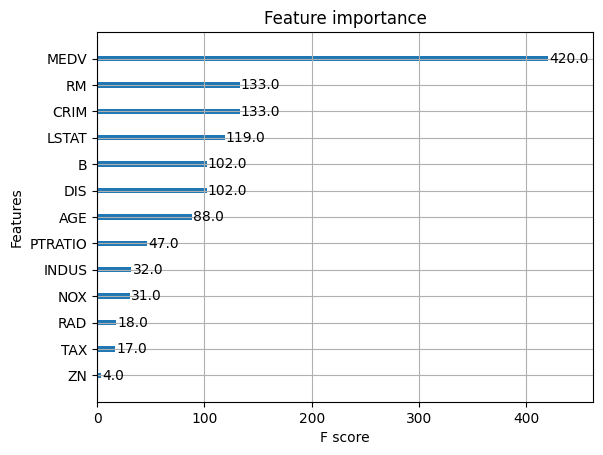

In [47]:
plot_importance(model_2)

In [50]:
X_train1=X_train.drop(['ZN','CHAS'],axis=1)
X_test1=X_test.drop(['ZN','CHAS'],axis=1)

In [51]:
from xgboost import XGBRegressor,plot_importance

model_2=XGBRegressor(n_estimators=170,max_depth=3,learning_rate=0.1)
model_2.fit(X_train1,Y_train)

pred_train=model_2.predict(X_train1)
pred_test=model_2.predict(X_test1)


print('Training Pred')
print(f'R2 SCORE : {r2_score(pred_train,Y_train)}  MEAN ABSOLUTE ERROR: {mean_absolute_error(pred_train,Y_train)}')

print('Testing Pred')
print(f'R2 SCORE : {r2_score(pred_test,Y_test)}  MEAN ABSOLUTE ERROR: {mean_absolute_error(pred_test,Y_test)}')

Training Pred
R2 SCORE : 0.9999164194355237  MEAN ABSOLUTE ERROR: 0.002623363451932381
Testing Pred
R2 SCORE : 0.9989913913172137  MEAN ABSOLUTE ERROR: 0.006363592028566207
